In [4]:
#Four-Hot Encodings

import pandas as pd

df = pd.read_csv("data.csv")

df.head()

,index,ResponseID,Are you selfemployed,How many employees does your company or organization have,Is your employer primarily a tech companyorganization,Is your primary role within your company related to techIT,Do you have previous employers,Do you have a family history of mental illness,Have you had a mental health disorder in the past,Do you currently have a mental health disorder,...,What country do you live in,What US state or territory do you live in,What country do you work in,What US state or territory do you work in,Which of the following best describes your work position,Do you work remotely,Question Group,Question about speaking openly about mental health vs physical health,Question,Response
0,0,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Does your employer provide mental health benef...,Not eligible for coverage / N/A
1,1,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Do you know the options for mental health care...,NaN
2,2,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Safe and supportive workplce for those with me...,No,Has your employer ever formally discussed ment...,No
3,3,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Does your employer offer resources to learn mo...,No
4,4,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Is your anonymity protected if you choose to t...,I don't know


In [5]:
pd.options.display.max_rows = 999

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60186 entries, 0 to 60185
Data columns (total 28 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   index                                                                                       60186 non-null  int64  
 1   ResponseID                                                                                  60186 non-null  object 
 2   Are you selfemployed                                                                        60186 non-null  bool   
 3   How many employees does your company or organization have                                   48132 non-null  object 
 4   Is your employer primarily a tech companyorganization                                       48132 non-null  object 
 5   Is your primary role within your compan

In [7]:
df.describe()

,index,What is your age
count,60186.000000,60102.000000
mean,30092.500000,34.106219
std,17374.345988,8.283055
min,0.000000,15.000000
25%,15046.250000,28.000000
50%,30092.500000,33.000000
75%,45138.750000,39.000000
max,60185.000000,99.000000


In [8]:
df["If so, what conditions were you diagnosed with"].value_counts()

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                                                7854
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                            6300
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                                              2688
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Defici

In [9]:
display(df["If so, what conditions were you diagnosed with"].value_counts())

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                                                7854
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                            6300
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                                              2688
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Defici

array([[<AxesSubplot: title={'center': 'What is your age'}>]],
      dtype=object)

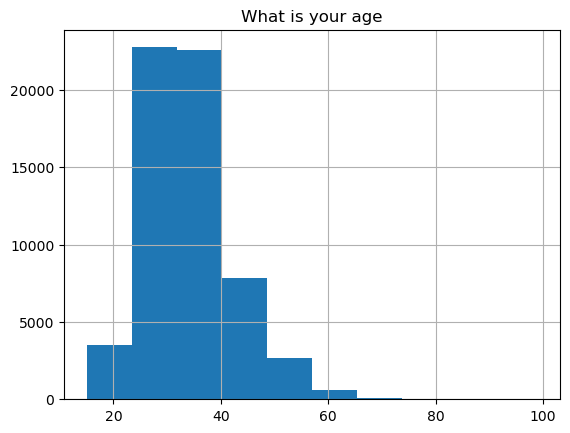

In [10]:
df.hist(column='What is your age')

In [11]:
df['Do you currently have a mental health disorder'].value_counts()

Yes      24150
No       22302
Maybe    13734
Name: Do you currently have a mental health disorder, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdc1c21b820>,
 [Text(-1.0474954056850978, 0.3357876934442546, 'Yes'),
  Text(0.5690319472576292, -0.9413833666472925, 'No'),
  Text(0.7227462058960695, 0.82923936343063, 'Maybe')],
 [Text(-0.5713611303736896, 0.18315692369686612, '40.1%'),
  Text(0.31038106214052497, -0.5134818363530685, '37.1%'),
  Text(0.3942252032160379, 0.45231238005307084, '22.8%')])

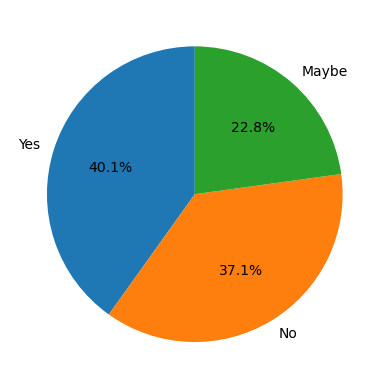

In [12]:
import numpy as np
from matplotlib import pyplot as plt

y = np.array([24150/60186,22302/60186, 13734/60186 ])
labels = ["Yes", "No", "Maybe"]
plt.pie(y, labels = labels, autopct='%1.1f%%', startangle=90)

In [16]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# One-hot encoding
for column in df:
    df[column] = le.fit_transform(df[column])

# Prepare feature and target variables
y = df["Do you currently have a mental health disorder"]
X = df.drop(columns="Do you currently have a mental health disorder")

# Set up K-folds cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=4)
knn = KNeighborsClassifier(n_neighbors=3)
scores = []

# Iterate over the splits
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train and evaluate the classifier
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

# Calculate the average performance
average_score = sum(scores) / len(scores)
print("Average score:", average_score)


Average score: 0.9745289909746864


50    35280
49     7560
11     3276
22     2436
34     2016
3      1470
46      798
21      672
28      630
47      420
8       420
35      378
26      378
41      378
10      294
20      294
17      294
30      210
6       210
44      168
40      168
45      168
39      168
4       168
36      126
38      126
12      126
16      126
31       84
29       84
37       84
7        84
0        84
19       84
33       84
14       84
32       84
1        42
42       42
48       42
24       42
13       42
51       42
18       42
25       42
5        42
27       42
2        42
9        42
52       42
23       42
43       42
15       42
Name: What country do you live in, dtype: int64


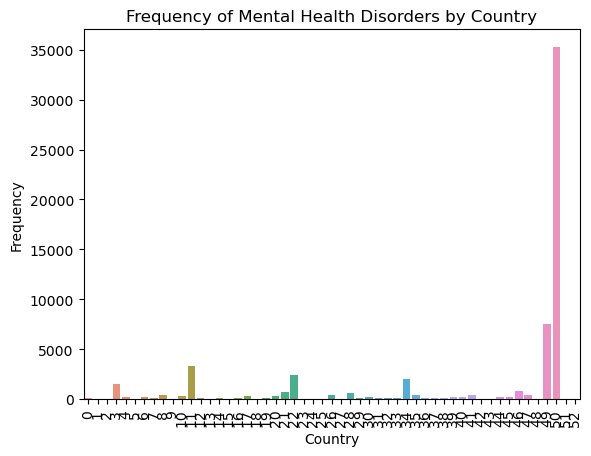

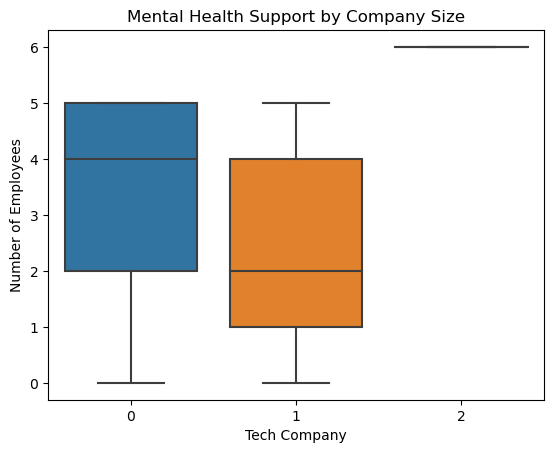

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the frequency of mental health disorders by country
country_counts = df['What country do you live in'].value_counts()
print(country_counts)

# Visualize the frequency of mental health disorders by country
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Frequency of Mental Health Disorders by Country")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

# Explore the relationship between mental health support and the number of employees
sns.boxplot(x='Is your employer primarily a tech companyorganization', y='How many employees does your company or organization have', data=df)
plt.title("Mental Health Support by Company Size")
plt.xlabel("Tech Company")
plt.ylabel("Number of Employees")
plt.show()


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


params = {
    'n_neighbors': range(1, 15, 2),
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_scaled, y)
print(clf.best_params_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


In [25]:
best_params = clf.best_params_
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], p=best_params['p'], weights=best_params['weights'])

# Iterate over the splits
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the classifier
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

# Calculate the average performance
average_score = sum(scores) / len(scores)
print("Average score:", average_score)

Average score: 0.9872561884595978
